> 심슨의 역설 

# 강의영상 

<https://youtube.com/playlist?list=PLQqh36zP38-wB73rDChn234r4ded7tDV_>

# imports

In [2]:
import pandas as pd
import numpy as np
from plotnine import *

# 심슨의 역설

`-` 버클리대학교의 입학데이터

- <https://github.com/guebin/DV2022/blob/master/_notebooks/ds.pdf>

`-` 주장: 버클리대학에 gender bias가 존재한다. 

- 1973년 가을학기의 입학통계에 따르면 지원하는 남성이 여성보다 훨씬 많이 합격했고, 그 차이가 너무 커서 우연의 일치라 보기 어렵다. 

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1)
df

,department,result,gender,count
0,A,fail,female,19
1,A,fail,male,314
2,A,pass,female,89
3,A,pass,male,511
4,B,fail,female,7
5,B,fail,male,208
6,B,pass,female,18
7,B,pass,male,352
8,C,fail,female,391
9,C,fail,male,204


## 시각화1: 전체합격률

`-` df1 

In [4]:
df.groupby(['gender','result']).agg({'count':np.sum}).reset_index()

,gender,result,count
0,female,fail,1063
1,female,pass,772
2,male,fail,1291
3,male,pass,1400


`-` df2 

In [5]:
df.groupby('gender').agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1)

,gender,count2
0,female,1835
1,male,2691


`-` merge: 두개의 데이터프레임을 합친다

In [6]:
df.groupby(['gender','result']).agg({'count':np.sum}).reset_index()\
.merge(df.groupby('gender').agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))

,gender,result,count,count2
0,female,fail,1063,1835
1,female,pass,772,1835
2,male,fail,1291,2691
3,male,pass,1400,2691


`-` 비율계산

In [7]:
df.groupby(['gender','result']).agg({'count':np.sum}).reset_index()\
.merge(df.groupby('gender').agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))\
.eval('rate = count/count2')

,gender,result,count,count2,rate
0,female,fail,1063,1835,0.579292
1,female,pass,772,1835,0.420708
2,male,fail,1291,2691,0.479747
3,male,pass,1400,2691,0.520253


`-` 시각화

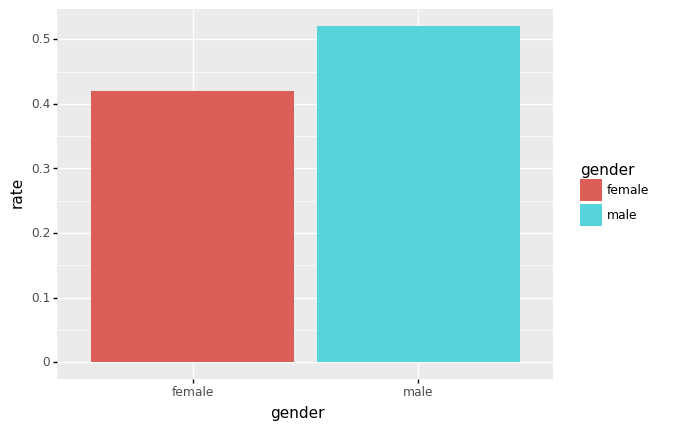

<ggplot: (8789343060161)>

In [8]:
data1= df.groupby(['gender','result']).agg({'count':np.sum}).reset_index()\
.merge(df.groupby('gender').agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))\
.eval('rate = count/count2')
ggplot(data1.query('result=="pass"'))+geom_col(aes(x='gender',fill='gender',y='rate'))

`-` 결론: 남자의 합격률이 더 높다. $\to$ 성차별이 있어보인다(?)

## 시각화2: 학과별 합격률

`-` df2

In [9]:
df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1)

,department,gender,count2
0,A,female,108
1,A,male,825
2,B,female,25
3,B,male,560
4,C,female,593
5,C,male,325
6,D,female,375
7,D,male,417
8,E,female,393
9,E,male,191


`-` merge

In [10]:
df.merge(df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))\
.eval('rate = count/count2')

,department,result,gender,count,count2,rate
0,A,fail,female,19,108,0.175926
1,A,pass,female,89,108,0.824074
2,A,fail,male,314,825,0.380606
3,A,pass,male,511,825,0.619394
4,B,fail,female,7,25,0.280000
5,B,pass,female,18,25,0.720000
6,B,fail,male,208,560,0.371429
7,B,pass,male,352,560,0.628571
8,C,fail,female,391,593,0.659359
9,C,pass,female,202,593,0.340641


`-` 시각화 

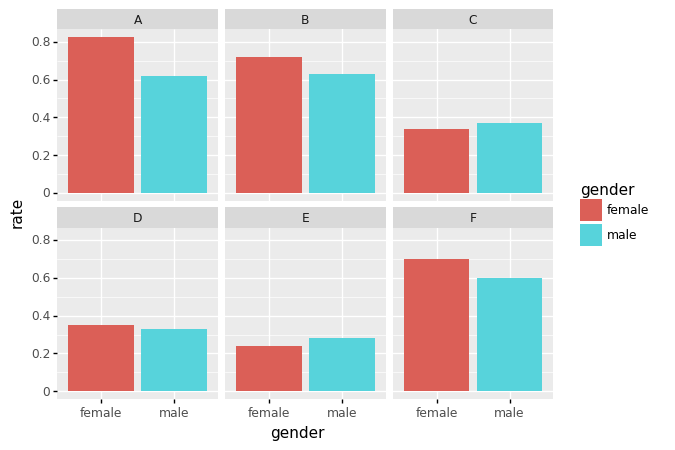

<ggplot: (8789343111249)>

In [11]:
data2=df.merge(df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))\
.eval('rate = count/count2')
ggplot(data2.query('result=="pass"'))+geom_col(aes(x='gender',fill='gender',y='rate'))\
+facet_wrap('department')

- 학과별로 살펴보니 오히려 A,B,F,D의 경우 여성의 합격률이 높다. 

`-` 교재에서 설명한 이유: 여성이 합격률이 낮은 학과에만 많이 지원하였기 때문 

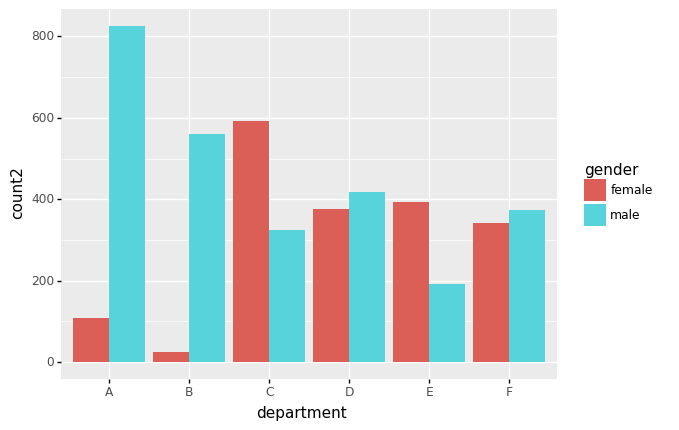

<ggplot: (8789343070225)>

In [12]:
ggplot(data2.query('result=="pass"'))+geom_col(aes(x='department',y='count2',fill='gender'),position='dodge')

- 살펴보니 합격률이 높은 A,B학과의 경우 상대적으로 남성이 많이 지원하였음. 합격률이 낮은 C,D학과는 상대적으로 여성이 많이 지원함. D,F의 지원수는 비슷

# HW

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson2.csv")
df

,department,result,gender,count
0,A,fail,female,0
1,A,fail,male,100
2,A,pass,female,1
3,A,pass,male,900
4,B,fail,female,400
5,B,fail,male,1
6,B,pass,female,600
7,B,pass,male,1


`-` 시각화1: 남녀합격률시각화 

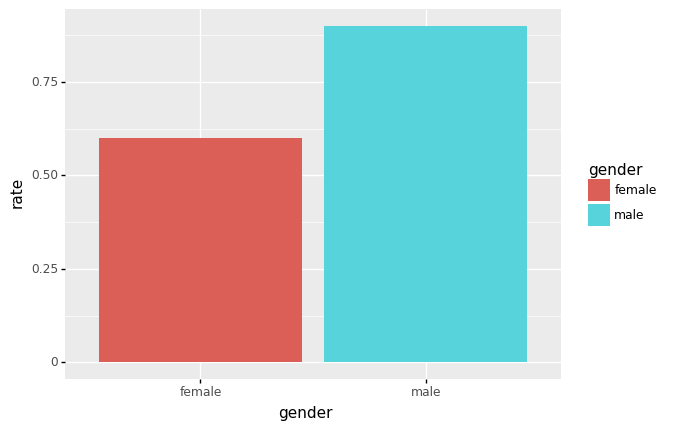

<ggplot: (8789342120725)>

In [20]:
# 시각화예시 

`-` 시각화2: 학과별 남녀합격률 시각화 

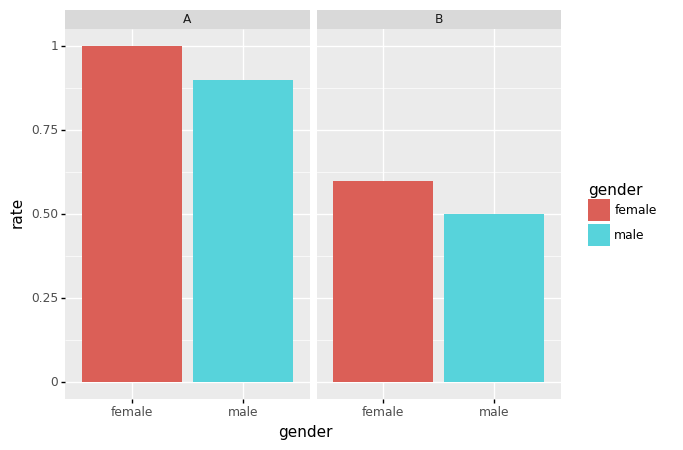

<ggplot: (8787281515073)>

In [330]:
# 시각화예시 

- A학과: 쓰면 거의 붙는 학과
- B학과: 쓰면 반정도 붙는 학과

`-` 시각화3: 학과별 지원자 수 시각화 

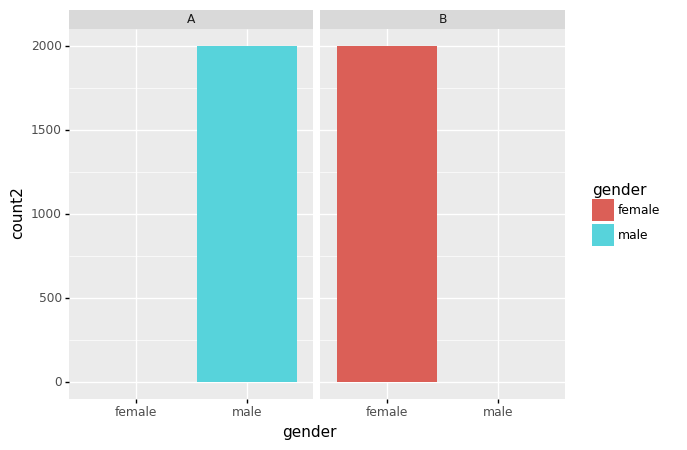

<ggplot: (8787281356149)>

In [332]:
# 시각화예시

- 여학생은 쓰면 붙는 A학과에는 거의 지원안함, 대신에 쓰면 반정도 붙는 B학과에 대부분 지원함 